In [110]:
import numpy as np
from scipy import signal
import mat4py as m4p
from scipy import signal 
from biosppy.signals import ecg
from matplotlib import pyplot as plt
import matplotlib
import pywt

In [2]:
def score_dict(data):
    scores={}
    for i in range(len(data)):
        scores[i]=np.stack((np.array(data[i]['ScoreValence']).flatten(),np.array(data[i]['ScoreArousal']).flatten(),np.array(data[i]['ScoreDominance']).flatten()))
    return scores

def baseline(data):
    ecg_base={}
    for i in range(len(data)):
        ecg_base[i]=np.array(data[i]['ECG']['baseline']).reshape((18,-1,2))
    return ecg_base

def stimuli(data):
    ecg_stimuli={}
    for i in range(len(data)):
        individual_stimuli={}
        for j in range(18):
            individual_stimuli[j]=np.array(data[i]['ECG']['stimuli'][j]).reshape((-1,2))
        ecg_stimuli[i]=individual_stimuli
    return ecg_stimuli

In [3]:
data=m4p.loadmat('DREAMER.mat')['DREAMER']['Data']
baseline=baseline(data)
stimuli=stimuli(data)

In [129]:
def select_n_slice(person,clip,dataset,seconds):
    select = ecg.ecg(signal=dataset[person][clip][:,0],sampling_rate=256,show=False)['filtered']
    length = select.shape[0]
    pts=seconds*256
    slices={}
    freq={}
    time={}
    i=0
    n=length//pts
    while i<n:
        freq[i],time[i],slices[i]=signal.spectrogram(select[i*pts:(i+1)*pts],fs=256,nperseg=32,noverlap=16)
        i+=1
    for i in freq.keys():
        f_name='images/{0}.png'.format(str(i)+'_p'+str(person)+'_c'+str(clip))
        plt.figure(figsize=(12,4))
        ax1=plt.pcolormesh(time[i],freq[i],np.log(slices[i]))
        ax1.axes.set_xticks([])
        ax1.axes.set_ylim(0,125)
        ax1.axes.set_yticks([])
        plt.savefig(f_name,pad_inches=-0.1,bbox_inches='tight',transparent=True)

/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/yinshuoyan/miniconda3/envs/DL_ENV/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` i

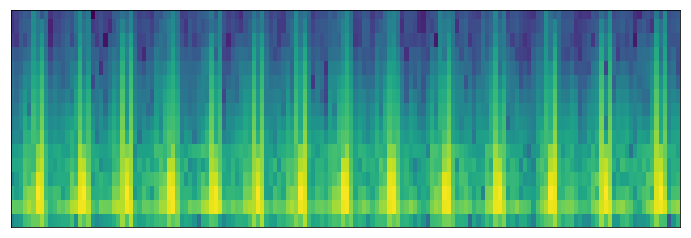

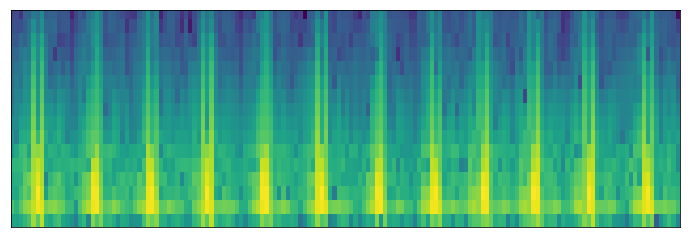

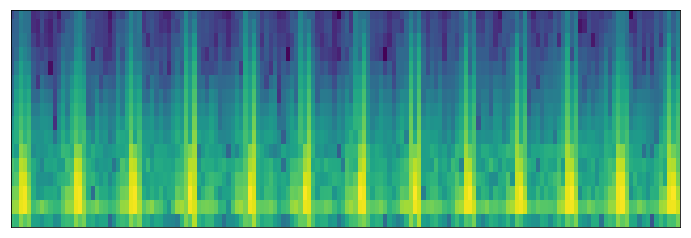

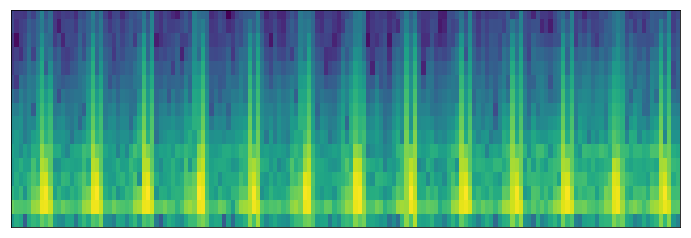

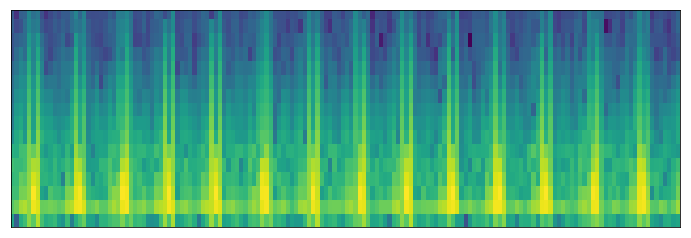

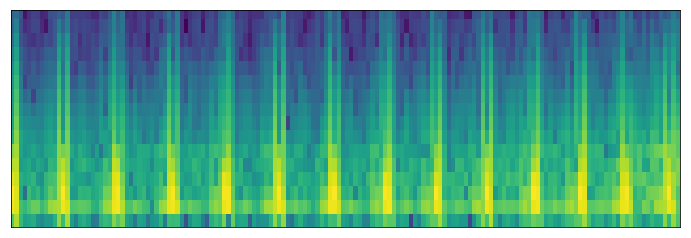

In [128]:
select_n_slice(0,8,baseline,10)